# Task 1 (5 pts) 


a) Provide a definition for the concept of a conjugate prior given the Bayesian learning model

b) True or False:
Selecting a Gaussian prior for a likelihood function that is Gaussian, will ensure that the posterior distribution is also Gaussian

Ans a)In Bayesian probability theory, if the posterior distributions p(θ|x) are in the same family as the prior probability distribution p(θ), the prior and posterior are then called conjugate distributions, and the prior is called a conjugate prior for the likelihood function. For example, the Gaussian family is conjugate to itself (or self-conjugate) with respect to a Gaussian likelihood function: if the likelihood function is Gaussian, choosing a Gaussian prior over the mean will ensure that the posterior distribution is also Gaussian. This means that the Gaussian distribution is a conjugate prior for the likelihood that is also Gaussian

b)True

#  Task 2 (5 pts). 

True or False:

1) In the Bayesian linear regression framework  
a) Using a Laplacian prior will lead to the Ridge Regression  
b) Using a Laplacian prior will lead to Lasso Regression

2)  
a) Ridge can often help with feature selection  
b) Lasso can often help with feature selection

Ans: (1a)False (1b)True (2a)False (2b)True

#  Task 3 (10 pts). 
Answer some questions about the properties of Lasso/Ridge:

1 a) Which regression adds penalty equivalent to square of the magnitude of coefficients?  
  b) Which regression adds penalty  equivalent to absolute value of the magnitude of coefficients?

2) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

3) Which of the Lasso and Ridge regression is often use to completely eliminate coefficients for some of the regressors?

4) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

5) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

# Extra Credit(15 pts)
For a regression where the variables were highly correlated, which would you use, Lasso or Ridge and why?

#### Ans :
1a - Ridge
1b - Lasso

2 - Ridge

3 - Lasso

4 - lambda = 0

5 - Validation


Extra Credit  
- Ridge: It will include all the highly correlated variables in the model but the coefficients will be distributed among them depending on the correlation.

#  Task 4 (15 pts). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=2$ and the prior $w\sim {\cal N}(4,2)$. Compute the posterior distribution after an observation $y=14,x=4$. After all, what is the probability of having $w<4$?

### Ans

$$
p(w|Y, X)\sim {\cal N}\left(\frac{ \sigma^{-2} \sum_i y_i x_i +(\sigma^*)^{-2} w^*}{\left(\sum_i x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)},
\frac{1}{\sqrt{(\sigma^*)^{-2}+\sum_i x_i^2\sigma^{-2}}}\right)
$$

$y\sim {\cal N}(wx,\sigma^2)$ here $\sigma=2$   
prior $w\sim {\cal N}(4,2)$ here $\sigma=2$  

In the above equation the second part is the std.dev(sigma) not variance - 
Refer Session 9 notes

In [20]:
import numpy as np
from scipy import stats

sigma = 2.0
prior_w = 4.0
prior_s = 2.0
y = 14
x = 4

sigma_s = (sigma**-2)
prior_ss = (prior_s**-2)

post_w = (sigma_s * np.sum(y * x) + prior_ss * prior_w)/(np.sum(x**2)* sigma_s + prior_ss)
post_s = (prior_ss + np.sum(x**2)* sigma_s)**-0.5

print 'Posterior Distribution y ~ N({0}, {1})'.format(post_w, post_s)
print 'Probability of having  w<4: ',stats.norm.cdf(4, post_w, post_s)

Posterior Distribution y ~ N(3.52941176471, 0.485071250073)
Probability of having  w<4:  0.834012266459


# Formula for R^squared remains same irrespective of the model

y_err = (predicted - test_y).reshape(test_y.shape[0],)  
y_norm = (test_y-np.mean(test_y)).reshape(test_y.shape[0],)  
r2 = 1-y_err.dot(y_err)/y_norm.dot(y_norm)

I have used the inbuild function ".score()", however the above method and the inbuild function return the same values

# Task 5 (20 pts)
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [1]:
## Learn to use np.array - Will be more useful in future especially 
## if you are thinking to learn deep learning
import pandas as pd
import numpy as np
from sklearn import linear_model

#It's totally ok if you have more variables than observations. Your y is the last column
#Data for training (30 observations, 40 independent variables, and 1 dependent variable)
#Data for prediction (20 observations, 40 independent variables, and 1 dependent variable)
data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

# Covert train and test dependent(X) and independent(Y) variables to numpy array
# Why Reshape? (Check train_y.shape with and without the reshape function)
train_x = np.asarray(data_train.iloc[:,:-1])
train_y = np.asarray(data_train.iloc[:,-1]).reshape(data_train.shape[0], 1)

test_x = np.asarray(data_test.iloc[:,:-1])
test_y = np.asarray(data_test.iloc[:,-1]).reshape(data_test.shape[0], 1)

In [13]:
#OLS
# Create linear regression object
model = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training set
model.fit(X=train_x, y=train_y)

# Make predictions using the testing set
predicted = model.predict(test_x)

# Find R^2 for InSample (train sample)
R_2_IS = model.score(X=train_x, y=train_y)

# Find R^2 for OutSample (test sample)
R_2_OS = model.score(X=test_x, y=test_y)

# A worse model will give negative R^2
print("The R-squared we found for IS OLS is: {0}".format(R_2_IS))
print("The R-squared we found for OS OLS is: {0}".format(R_2_OS))

The R-squared we found for IS OLS is: 1.0
The R-squared we found for OS OLS is: -1.02796436413


In [158]:
# In the next question, look for the coefficient values and compare with these values
model.coef_

array([[  2.31902748e+00,   4.63744950e+00,  -1.72738298e+00,
         -9.29175532e-01,  -3.99571266e+00,  -2.05496459e-01,
         -1.72285670e+00,  -2.05147724e+00,  -1.01189964e+00,
         -5.74089871e-01,   2.38338025e+00,   1.21378008e+00,
         -6.00459785e-01,   1.56371782e+00,  -1.46452233e+00,
         -2.16737469e+00,  -2.36991539e+00,  -2.31294719e+00,
          1.96455308e-01,  -2.11398053e+00,   1.56105603e+00,
          2.21234655e-01,   6.40878762e-02,   1.14186709e-01,
          1.83096926e-01,   8.15912650e-02,   7.78240271e-02,
         -2.71753628e-01,  -1.29301604e-01,   2.47024556e-03,
         -3.31409532e-02,  -2.73999347e-02,   1.43520285e-01,
         -1.89944323e-02,  -1.50355079e-01,  -1.43814007e-01,
         -3.31469536e-01,   2.36282193e-02,  -1.47566697e-01,
         -3.23838306e-02]])

# Task 6 (20% credit).
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ and report their performance over the test set.

In [123]:
## Learn to use np.array - Will be more useful in future especially 
## if you are thinking to learn deep learning
import pandas as pd
import numpy as np
from sklearn import linear_model

#It's totally ok if you have more variables than observations. Your y is the last column
#Data for training (30 observations, 40 independent variables, and 1 dependent variable)
#Data for prediction (20 observations, 40 independent variables, and 1 dependent variable)
data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

# Covert train and test dependent(X) and independent(Y) variables to numpy array
# Why Reshape? (Check train_y.shape with and without the reshape function)
train_x = np.asarray(data_train.iloc[:,:-1])
train_y = np.asarray(data_train.iloc[:,-1]).reshape(data_train.shape[0], 1)

test_x = np.asarray(data_test.iloc[:,:-1])
test_y = np.asarray(data_test.iloc[:,-1]).reshape(data_test.shape[0], 1)

In [126]:
#For Lasso
lasso_alpha=30

# Create Lasso regression object
Lasso=linear_model.Lasso(fit_intercept=True, alpha=lasso_alpha)

# Train the model using the training set
Lasso.fit(train_x,train_y)

# Prediction on the InSample data (train) 
p_IS=Lasso.predict(train_x)

# InSample R^2: 
print("The R-squared we found for IS Lasso is: {0}".format(Lasso.score(X=train_x, y=train_y)))

# Prediction on the OutSample data (test) 
p_OS=Lasso.predict(test_x)

# OutSample R^2: 
print("The R-squared we found for OS Lasso is: {0}".format(Lasso.score(X=test_x, y=test_y)))

The R-squared we found for IS Lasso is: 0.878135684241
The R-squared we found for OS Lasso is: 0.61628192505


In [125]:
# For Ridge
ridge_alpha = 3000

# Create Ridge regression object
Ridge=linear_model.Ridge(fit_intercept=True,alpha=ridge_alpha) 

# Train the model using the training set
Ridge.fit(train_x,train_y)

# Prediction on the InSample data (train) 
p_IS=Ridge.predict(train_x)

# InSample R^2: 
print("The R-squared we found for IS Ridge is: {0}".format(Ridge.score(train_x,train_y)))
    
# Prediction on the OutSample data (test) 
p_OS=Ridge.predict(test_x)

# OutSample R^2: 
print("The R-squared we found for OS Ridge is: {0}".format(Ridge.score(test_x,test_y)))

The R-squared we found for IS Ridge is: 0.919670798394
The R-squared we found for OS Ridge is: 0.477545551162


In [83]:
# Some Coefficents has been suppressed by lasso
Lasso.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.32959648,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.03761231,  0.        ,  0.02296282,
        0.        ,  0.        , -0.09973022,  0.00386805,  0.        ,
       -0.        , -0.        ,  0.1201965 , -0.        , -0.        ,
        0.        , -0.        , -0.01205282,  0.        , -0.05620111])

In [84]:
# Coefficients has been reduced in magnitude
Ridge.coef_

array([[ 0.04691034,  0.05475938,  0.01985365,  0.01831845, -0.03107978,
         0.00110298,  0.04880771,  0.02095425,  0.05722274,  0.00894506,
        -0.01869147,  0.01349058, -0.06166989, -0.00028001, -0.01572309,
         0.02403381, -0.00316209, -0.02630219, -0.05250878,  0.00818973,
         0.04722242,  0.00155167,  0.06999245,  0.03657683,  0.06131411,
         0.03642792,  0.00967269, -0.13285374,  0.00171944,  0.04929704,
        -0.05597414,  0.00356014,  0.16685296, -0.07924635, -0.00473457,
        -0.0457496 , -0.06714469, -0.01982918,  0.00333842, -0.06968026]])

# Task 7 (25% credit)
a) For each $m=0,1,2,...39$ train OLS, Lasso and Ridge regressions(keep intercept) using the training sample above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ using the first $m$ columns of the data tables as the regressors  
i.e train the models by adding in a new variable each time. eg. Y~ x0, Y~x0+x1, Y~x0+x1+x2...Y~x0+x1+...+x39  

b) Plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.  
i.e (x-axis is number of regressors, y will be your R^2 for InSample & OutSample for each of the 3 models, all in one graph)


In [86]:
## Learn to use np.array - Will be more useful in future especially 
## if you are thinking to learn deep learning
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

#It's totally ok if you have more variables than observations. Your y is the last column
#Data for training (30 observations, 40 independent variables, and 1 dependent variable)
#Data for prediction (20 observations, 40 independent variables, and 1 dependent variable)
data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

# Covert train and test dependent(X) and independent(Y) variables to numpy array
# Why Reshape? (Check train_y.shape with and without the reshape function)
train_x = np.asarray(data_train.iloc[:,:40])
train_y = np.asarray(data_train.iloc[:,-1]).reshape(data_train.shape[0], 1)

test_x = np.asarray(data_test.iloc[:,:40])
test_y = np.asarray(data_test.iloc[:,-1]).reshape(data_test.shape[0], 1)

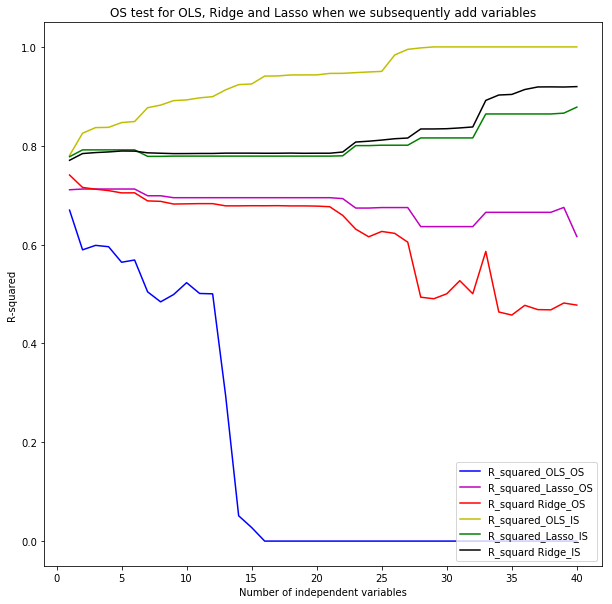

In [87]:
#make lists to save R2
Number_variables=[]
Ridge_R2_IS_F=[]
Ridge_R2_OS_F=[]

Lasso_R2_IS_F=[]
Lasso_R2_OS_F=[]

OLS_R2_OS_F=[]
OLS_R2_IS_F=[]

#Var to keep count of no. of regressors
t=0

for j in range(train_x.shape[1]): #subsequently add regressors one by one
    
    t+=1
    Number_variables.append(t)
    
    # Create the train set
    X=train_x[:,0:j+1] #Each iteration will add new regressor
    y=train_y
    
    # Create the test set
    Xp = test_x[:,0:j+1]
    yp = test_y
    
    #OLS
    model = linear_model.LinearRegression(fit_intercept=True)
    model.fit(X=X, y=y)
    
    #OLS InSample
    R2_IS = model.score(X=X, y=y)
    OLS_R2_IS_F.append(R2_IS)
    
    #OLS OutSample 
    #(If the model is too bad, it may give negative R^2, so I have kept it as zero)
    R2_OS = model.score(X=Xp, y=yp)
    if R2_OS>0:
        OLS_R2_OS_F.append(R2_OS)
    else:
        OLS_R2_OS_F.append(0)
    
    #Lasso
    lasso_alpha=30
    Lasso=linear_model.Lasso(fit_intercept=True, alpha=lasso_alpha)
    Lasso.fit(X=X, y=y)
    
    #Lasso InSample
    R2_IS = Lasso.score(X=X, y=y)
    Lasso_R2_IS_F.append(R2_IS)
    
    #Lasso OutSample
    #(If the model is too bad, it may give negative R^2, so I have kept it as zero)
    R2_OS = Lasso.score(X=Xp, y=yp) 
    if R2_OS>0:
        Lasso_R2_OS_F.append(R2_OS)
    else:
        Lasso_R2_OS_F.append(0)
        
    # Ridge
    ridge_alpha = 3000
    Ridge=linear_model.Ridge(fit_intercept=True,alpha=ridge_alpha) 
    Ridge.fit(X=X, y=y)
    
    #Ridge InSample
    R2_IS = Ridge.score(X=X, y=y)
    Ridge_R2_IS_F.append(R2_IS)
    
    #Ridge OutSample
    #(If the model is too bad, it may give negative R^2, so I have kept it as zero)
    R2_OS = Ridge.score(X=Xp, y=yp)
    if R2_OS>0:
        Ridge_R2_OS_F.append(R2_OS)
    else:
        Ridge_R2_OS_F.append(0)
        
# Plot the required six lines
plt.figure(figsize=(10,10))
plt.title('OS test for OLS, Ridge and Lasso when we subsequently add variables')
plt.plot(Number_variables,OLS_R2_OS_F,'b',label='R_squared_OLS_OS')
plt.plot(Number_variables,Lasso_R2_OS_F,'m',label='R_squared_Lasso_OS')
plt.plot(Number_variables,Ridge_R2_OS_F,'r',label='R_squard Ridge_OS')

plt.plot(Number_variables,OLS_R2_IS_F,'y',label='R_squared_OLS_IS')
plt.plot(Number_variables,Lasso_R2_IS_F,'g',label='R_squared_Lasso_IS')
plt.plot(Number_variables,Ridge_R2_IS_F,'k',label='R_squard Ridge_IS')


plt.legend(loc='lower right')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()

# Extracredit (30 pts of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 70% training and 30% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression:   

a) For each $\lambda$ of the considered sequence of $\lambda$s compute validation R2 for all the 10 splits and finally select the $\lambda$ having the highest value for validation R2 for each split.  

b) Visualize the dependence of the validation R2 over $\lambda$s for Lasso and Ridge(x-axis = alphas from sequence, y-axis = corresponding R^2, graph for each split)

c) Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$ out of the 10 splits.

In [60]:
#Find the optimal Alpha for Ridge.
def check_R_2_Ridge_find_alpha(X,y,alpha,p=0.7,Graph=False):
 
    #X is training set
    #y is target sequences
    #alpha: a list of alphas for training
    #p: proportion of training sample
    #Graph: we can see the graph of R^2 w.r.t. different alphas.
##############################################################################################################################    
   
    R2_OS_ridge=[] #make a list to store R-squared. We need in end to pick the alpha c.r.t. biggest R2.
    
    train = random.sample(list(range(len(X))),int(len(X)*p)) #choose some rows as train data    
    validation_index=[x for x in list(range(len(X))) if x not in train] # Use the rest of rows as our validation rows.
    
    X_validation=X[validation_index,:]
    y_validation=y[validation_index]

    X_train=X[train,:]
    y_train=y[train]
    
    
    for a in alpha:
        Ridge=linear_model.Ridge(fit_intercept=True, alpha=a)
        Ridge.fit(X_train,y_train)  #fit Ridge model
        
        R2_OS=Ridge.score(X_validation, y_validation)
        R2_OS_ridge.append(R2_OS)
    
#Graph
    if Graph==True:
        plt.title('OS-R-squared for different Alpha for Ridge')
        plt.plot(alpha, R2_OS_ridge,'b',label='Ridge')
        plt.legend(loc='upper right')
        plt.xlabel('Alphas')
        plt.ylabel('R-squared')

        plt.show()


#Find the alpha that has the biggest R^2
    temp=np.concatenate(([np.asarray(R2_OS_ridge)],[alpha]),axis=0)
    for i in range(len(temp.T)):
        if temp[0,i]==np.amax(temp[0,:]):
            l=temp[1,i]
    print("The best alpha we found for Ridge is:{0}".format(l))
    return l

In [61]:
# Find optimal Alpha for Lasso   
def check_R_2_Lasso_find_alpha(X,y,alpha,p=0.7,max_iter=100000,Graph=False):
 
    #X is training set
    #y is target sequences
    #alpha: a list of alphas for training
    #p: proportion of training sample
    #Graph: we can see the graph of R^2 w.r.t. different alphas.
##############################################################################################################################    
   
    R2_OS_lasso=[] #make a list to store R-squared
    
    train = random.sample(list(range(len(X))),int(len(X)*p)) #choose some rows as train data    
    validation_index=[x for x in list(range(len(X))) if x not in train] # Use the rest of rows as our validation rows.
    
    X_validation=X[validation_index,:]
    y_validation=y[validation_index]

    X_train=X[train,:]
    y_train=y[train]
    
    
    for a in alpha:
        Lasso=linear_model.Lasso(fit_intercept=True, alpha=a,)
        Lasso.fit(X_train,y_train)
        
        R2_OS=Lasso.score(X_validation, y_validation)
        R2_OS_lasso.append(R2_OS)
    
#Graph
    if Graph==True:
        plt.title('OS-R-squared for different Alpha for Lasso')
        plt.plot(alpha,R2_OS_lasso,'b',label='Lasso')
        plt.legend(loc='upper right')
        plt.xlabel('Alphas')
        plt.ylabel('R-squared')
        plt.show()


#Find the alpha that has the biggest R^2
    temp=np.concatenate(([np.asarray(R2_OS_lasso)],[alpha]),axis=0)
    for i in range(len(temp.T)):
        if temp[0,i]==np.amax(temp[0,:]):
            l=temp[1,i]
    print("The best alpha we found for Lasso is:{0}".format(l))
    return l

In [62]:
## Learn to use np.array - Will be more useful in future especially 
## if you are thinking to learn deep learning
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

#It's totally ok if you have more variables than observations. Your y is the last column
#Data for training (30 observations, 40 independent variables, and 1 dependent variable)
#Data for prediction (20 observations, 40 independent variables, and 1 dependent variable)
data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

# Covert train and test dependent(X) and independent(Y) variables to numpy array
# Why Reshape? (Check train_y.shape with and without the reshape function)
train_x = np.asarray(data_train.iloc[:,:40])
train_y = np.asarray(data_train.iloc[:,-1]).reshape(data_train.shape[0], 1)

test_x = np.asarray(data_test.iloc[:,:40])
test_y = np.asarray(data_test.iloc[:,-1]).reshape(data_test.shape[0], 1)

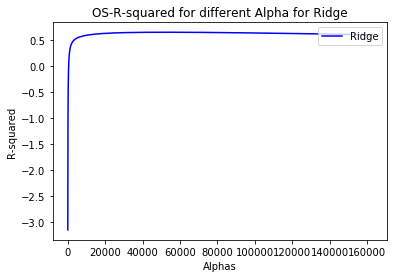

The best alpha we found for Ridge is:54971.6493153
The R-squared we found for OS Ridge is: 0.691351444529


/Users/tusharahuja/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


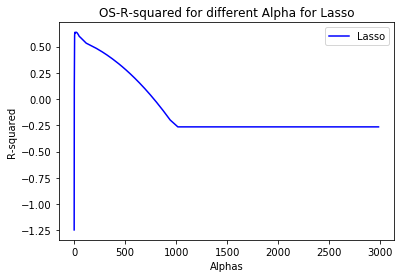

The best alpha we found for Lasso is:17.2214180764
The R-squared we found for OS Lasso is: 0.567993054571


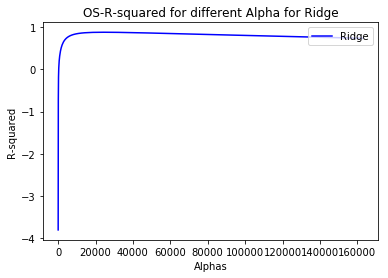

The best alpha we found for Ridge is:24355.2451665
The R-squared we found for OS Ridge is: 0.630121087588


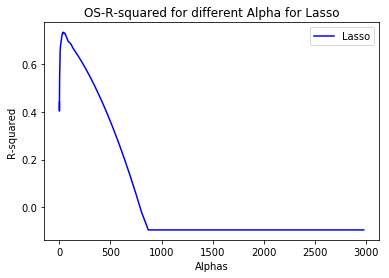

The best alpha we found for Lasso is:34.4139339297
The R-squared we found for OS Lasso is: 0.631896223569


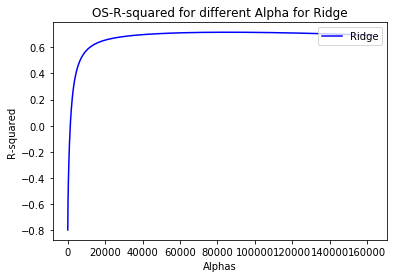

The best alpha we found for Ridge is:82587.0394821
The R-squared we found for OS Ridge is: 0.718909184423


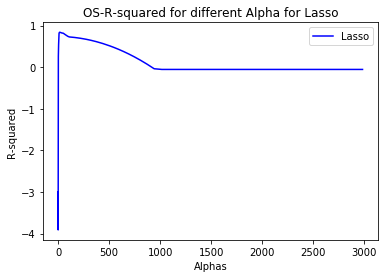

The best alpha we found for Lasso is:13.6724740106
The R-squared we found for OS Lasso is: 0.538905955803


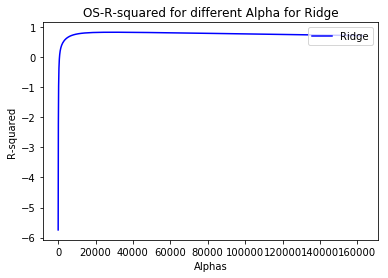

The best alpha we found for Ridge is:27894.3908982
The R-squared we found for OS Ridge is: 0.640440036459


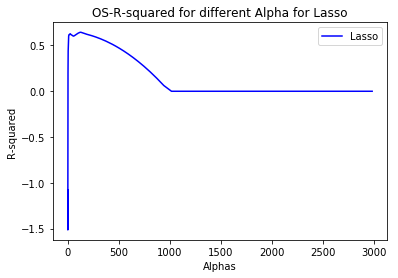

The best alpha we found for Lasso is:127.25002427
The R-squared we found for OS Lasso is: 0.753066899237


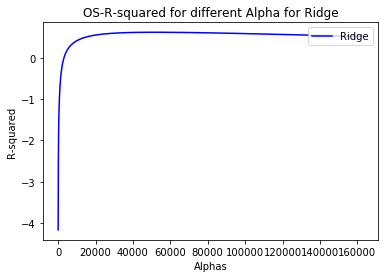

The best alpha we found for Ridge is:54971.6493153
The R-squared we found for OS Ridge is: 0.691351444529


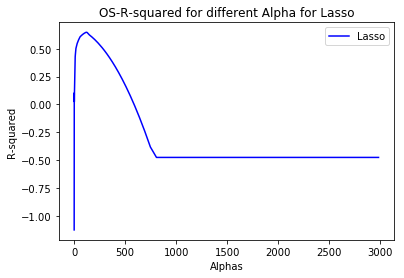

The best alpha we found for Lasso is:117.82856973
The R-squared we found for OS Lasso is: 0.750694656723


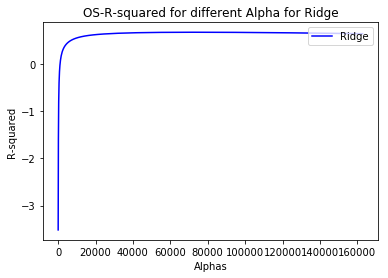

The best alpha we found for Ridge is:72108.6759522
The R-squared we found for OS Ridge is: 0.710222035981


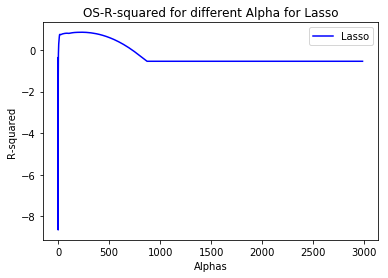

The best alpha we found for Lasso is:235.459391075
The R-squared we found for OS Lasso is: 0.774271092901


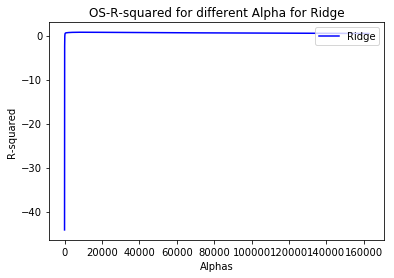

The best alpha we found for Ridge is:9421.53936576
The R-squared we found for OS Ridge is: 0.560065654951


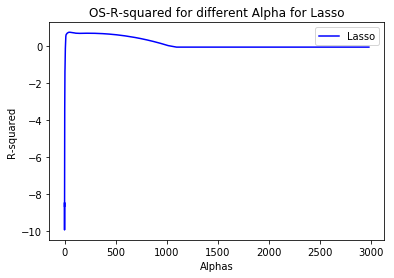

The best alpha we found for Lasso is:46.8126678173
The R-squared we found for OS Lasso is: 0.666221358766


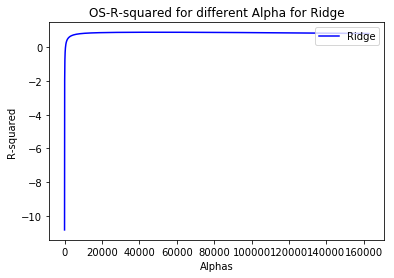

The best alpha we found for Ridge is:47997.0328504
The R-squared we found for OS Ridge is: 0.681430484992


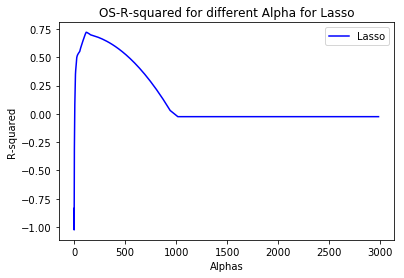

The best alpha we found for Lasso is:117.82856973
The R-squared we found for OS Lasso is: 0.750694656723


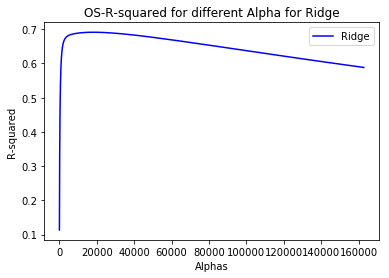

The best alpha we found for Ridge is:18567.0861183
The R-squared we found for OS Ridge is: 0.609632201884


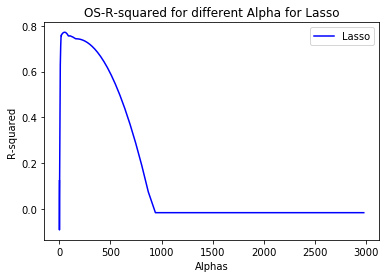

The best alpha we found for Lasso is:50.5557618966
The R-squared we found for OS Lasso is: 0.674697991028


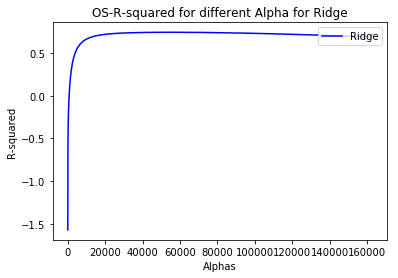

The best alpha we found for Ridge is:54971.6493153
The R-squared we found for OS Ridge is: 0.691351444529


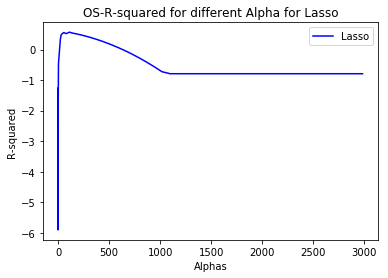

The best alpha we found for Lasso is:109.104669522
The R-squared we found for OS Lasso is: 0.748244914603


In [63]:
Ridge_R2_OS=[]
Lasso_R2_OS=[]
lambda_Ridge=[]
lambda_Lasso=[]

alpha = np.linspace(-15,12,200)
alpha_ridge=[math.exp(i) for i in alpha]

alpha = np.linspace(-15,8,300)
alpha_lasso=[math.exp(i) for i in alpha]

for i in range(10):
#Ridge 
    alpha=check_R_2_Ridge_find_alpha(X=train_x,y=train_y,alpha=alpha_ridge,p=0.7,Graph=True)
    
    lambda_Ridge.append(alpha)

    Ridge=linear_model.Ridge(fit_intercept=True,alpha=alpha)
    Ridge.fit(train_x,train_y)
  
    #Out of sample
    R2_OS = Ridge.score(test_x, test_y)
    print("The R-squared we found for OS Ridge is: {0}".format(R2_OS))
    if R2_OS>0:
        Ridge_R2_OS.append(R2_OS)
    else:
        Ridge_R2_OS.append(0)

#Lasso
    alpha=check_R_2_Lasso_find_alpha(X=train_x,y=train_y,alpha=alpha_lasso,p=0.7,Graph=True)
    
    lambda_Lasso.append(alpha)
    Lasso=linear_model.Lasso(fit_intercept=True, alpha=alpha)
    Lasso.fit(train_x,train_y)

    #Out of sample:
    R2_OS=Lasso.score(test_x, test_y)
    print("The R-squared we found for OS Lasso is: {0}".format(R2_OS))
    if R2_OS>0:
        Lasso_R2_OS.append(R2_OS)
    else:
        Lasso_R2_OS.append(0)    

In [64]:
Lambda_R=pd.DataFrame([Ridge_R2_OS,lambda_Ridge])
Lambda_L=pd.DataFrame([Lasso_R2_OS,lambda_Lasso])

print("When the lambda for Lasso ={}, we reach the corresponding max OS R2={}".format(
        Lambda_L.T.loc[Lambda_L.T.iloc[:,0].idxmax()][1],Lambda_L.T.loc[Lambda_L.T.iloc[:,0].idxmax()][0]))

print("When the lambda for Ridge ={}, we reach the corresponding max OS R2={}".format(
        Lambda_R.T.loc[Lambda_R.T.iloc[:,0].idxmax()][1],Lambda_R.T.loc[Lambda_R.T.iloc[:,0].idxmax()][0]))

When the lambda for Lasso =235.459391075, we reach the corresponding max OS R2=0.774271092901
When the lambda for Ridge =82587.0394821, we reach the corresponding max OS R2=0.718909184423


# PS
A better method for analysis would be to calculate average validation R^2 for 10 splits with each lambda and then select the lambda which has a higher avg. validation R^2